In [1]:
from model import process_values_sensi
import pandas as pd
from tqdm.notebook import tqdm

%matplotlib inline

N_SIMULATIONS = 3

In [2]:
df_variables = pd.read_csv("bdd_variables.csv")

In [3]:
grids = dict()
for idx, row in tqdm(df_variables.iterrows(), total=df_variables.shape[0]):
    grid_values = np.zeros(N_SIMULATIONS)

    for k, val in enumerate(np.linspace(row['mini'], row['val'] * 2, N_SIMULATIONS)):
        df_new = df_variables.copy()
        df_new['upd_variables'].values[idx] = val
        grid_values[k] = process_values_sensi(df_new)

    grids[df_new.iloc[idx]["nom_variable"]] = grid_values

In [4]:
indices = dict()

for k in grids.keys():
    my_min = min(grids[k])
    my_max = max(grids[k])

    indice_bamby = 1 - (my_min / my_max)
    indices[k] = round(indice_bamby, 3)

bauer_bamby = pd.DataFrame(indices, index=['Indice de Bauer-Hamby']).T.sort_values(by='Indice de Bauer-Hamby', ascending=True)


In [5]:
categs = list()
for nom_var in bauer_bamby.index:
    c = df_variables[df_variables["nom_variable"] == nom_var]["category"]
    categs.append(c.values[0])
    
bauer_bamby["Catégorie"] = categs

### On affiche les indices de Bauer-Hamby sous forme de diagramme

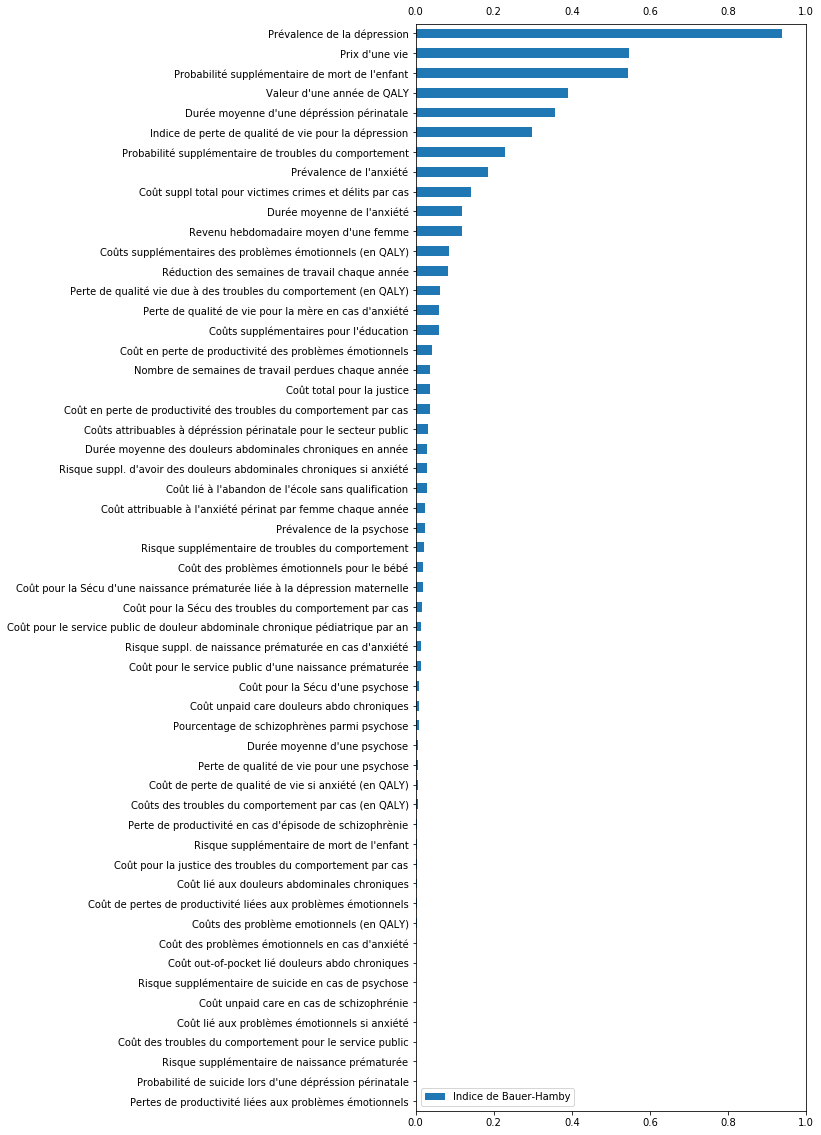

In [7]:
ax = bauer_bamby.plot(kind='barh', figsize=(7, 20))
ax.set_xlim([0, 1])

ax.tick_params(
    labelbottom=True,
    labeltop=True
)

### Ici, on groupe les variables par catégorie pour étudier l'impact de chaque catégorie sur le résultat final


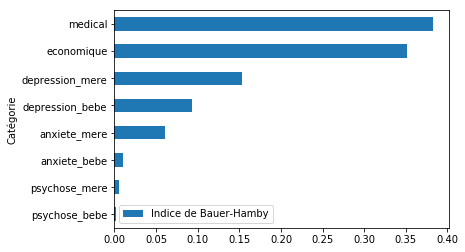

In [8]:
bauer_bamby.groupby("Catégorie")["Indice de Bauer-Hamby"].mean().to_frame().sort_values(
    by="Indice de Bauer-Hamby"
).plot(kind="barh")


## Annexes

In [16]:
"""s1 = pd.read_csv('bdd_variables.csv')
s2 = pd.read_csv('bdd_variables_old.csv')
s2.columns = [s+'_c' for s in s2.columns]
df_c = pd.concat([s1, s2], axis=1)

df_c[df_c["nom_variable"] != df_c["nom_variable_c"]][["nom_variable", "nom_variable_c"]].values"""